In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv(r"A:\Data analyst\Python projects\Portuguese Bank Marketing Data Set\bank_cleaned.csv")


In [99]:
df

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,45205,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,1
40837,45206,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,1
40838,45207,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,1
40839,45208,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,1


In [6]:
df.info

<bound method DataFrame.info of        Unnamed: 0  age           job   marital  education default  balance  \
0               0   58    management   married   tertiary      no     2143   
1               1   44    technician    single  secondary      no       29   
2               2   33  entrepreneur   married  secondary      no        2   
3               5   35    management   married   tertiary      no      231   
4               6   28    management    single   tertiary      no      447   
...           ...  ...           ...       ...        ...     ...      ...   
40836       45205   25    technician    single  secondary      no      505   
40837       45206   51    technician   married   tertiary      no      825   
40838       45207   71       retired  divorced    primary      no     1729   
40839       45208   72       retired   married  secondary      no     5715   
40840       45209   57   blue-collar   married  secondary      no      668   

      housing loan  day month  

In [7]:
df.describe

<bound method NDFrame.describe of        Unnamed: 0  age           job   marital  education default  balance  \
0               0   58    management   married   tertiary      no     2143   
1               1   44    technician    single  secondary      no       29   
2               2   33  entrepreneur   married  secondary      no        2   
3               5   35    management   married   tertiary      no      231   
4               6   28    management    single   tertiary      no      447   
...           ...  ...           ...       ...        ...     ...      ...   
40836       45205   25    technician    single  secondary      no      505   
40837       45206   51    technician   married   tertiary      no      825   
40838       45207   71       retired  divorced    primary      no     1729   
40839       45208   72       retired   married  secondary      no     5715   
40840       45209   57   blue-collar   married  secondary      no      668   

      housing loan  day month

In [9]:
df.isnull().sum()

Unnamed: 0         0
age                0
job                0
marital            0
education          0
default            0
balance            0
housing            0
loan               0
day                0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
response           0
response_binary    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [12]:
df.dtypes

Unnamed: 0           int64
age                  int64
job                 object
marital             object
education           object
default             object
balance              int64
housing             object
loan                object
day                  int64
month               object
duration           float64
campaign             int64
pdays                int64
previous             int64
poutcome            object
response            object
response_binary      int64
dtype: object

In [101]:
Cat_col_obj = df.select_dtypes(include='object').columns.tolist()
Cat_col_int = df.select_dtypes(include='int64').columns.tolist()
print(Cat_col_int,Cat_col_obj)

['Unnamed: 0', 'age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'response_binary'] ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome', 'response']


In [18]:
for col in Cat_col_obj:
    df[col] = df[col].str.strip().str.lower()

In [25]:
for col in Cat_col_obj:
    df[col] = print(df[col].unique())


['management' 'technician' 'entrepreneur' 'retired' 'admin.' 'services'
 'blue-collar' 'self-employed' 'unemployed' 'housemaid' 'student' 'other']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'primary']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'failure' 'success']
['no' 'yes']


In [28]:
# Example: Simplifying education
df['education'] = df['education'].replace({
    'basic.4y': 'basic',
    'basic.6y': 'basic',
    'basic.9y': 'basic',
    'illiterate': 'no_education',
    'university.degree': 'university',
    'professional.course': 'professional'
})

# Example: Replace 'unknown' with np.nan
df['job'] = df['job'].replace('unknown', np.nan)


In [31]:
def age_class(old):
    if old < 30:
        return 'Young'
    elif 30 <= old < 60: 
        return 'Middle-aged'
    else: 
        return 'Old'

df['age_category'] = df['age'].apply(age_class)


In [36]:
df['contact_intensity'] = df['campaign'] + df['previous']


In [37]:
df['pdays']

0         -1
1         -1
2         -1
3         -1
4         -1
        ... 
40836     -1
40837     -1
40838     -1
40839    184
40840     -1
Name: pdays, Length: 40841, dtype: int64

In [38]:
df['recent_contact'] = df['pdays'].apply(lambda x:'no' if x==999 else 'yes')

In [40]:
df

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,...,duration,campaign,pdays,previous,poutcome,response,response_binary,age_category,contact_intensity,recent_contact
0,0,58,None,None,None,None,2143,None,None,5,...,4.35,1,-1,0,None,None,0,Middle-aged,1,yes
1,1,44,None,None,None,None,29,None,None,5,...,2.52,1,-1,0,None,None,0,Middle-aged,1,yes
2,2,33,None,None,None,None,2,None,None,5,...,1.27,1,-1,0,None,None,0,Middle-aged,1,yes
3,5,35,None,None,None,None,231,None,None,5,...,2.32,1,-1,0,None,None,0,Middle-aged,1,yes
4,6,28,None,None,None,None,447,None,None,5,...,3.62,1,-1,0,None,None,0,Young,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,45205,25,None,None,None,None,505,None,None,17,...,6.43,2,-1,0,None,None,1,Young,2,yes
40837,45206,51,None,None,None,None,825,None,None,17,...,16.28,3,-1,0,None,None,1,Middle-aged,3,yes
40838,45207,71,None,None,None,None,1729,None,None,17,...,7.60,2,-1,0,None,None,1,Old,2,yes
40839,45208,72,None,None,None,None,5715,None,None,17,...,18.78,5,184,3,None,None,1,Old,8,yes


In [41]:
job_response_rate = df.groupby('job')['response_binary'].mean().sort_values(ascending=False)


In [45]:
response_counts = df['response_binary'].value_counts()


response_binary
0    36202
1     4639
Name: count, dtype: int64

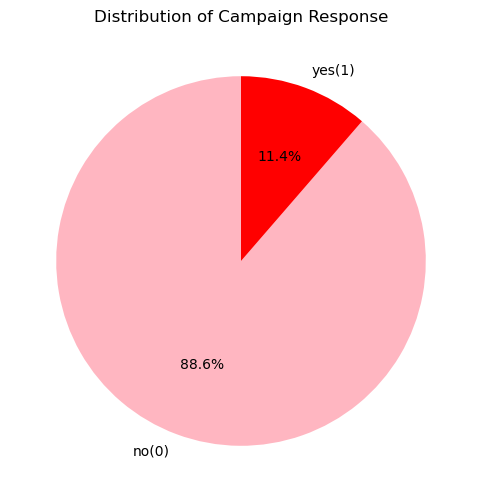

In [72]:
response_counts = df['response_binary'].value_counts()
labels = ['no(0)','yes(1)']
plt.figure(figsize=(6,6))
plt.pie(response_counts,labels=labels,startangle=90, autopct='%1.1f%%',colors=['lightpink','red'])
plt.title('Distribution of Campaign Response')
plt.show()

In [83]:
df['age_category'],df['response_convo_col'],df['response_binary']

(0        Middle-aged
 1        Middle-aged
 2        Middle-aged
 3        Middle-aged
 4              Young
             ...     
 40836          Young
 40837    Middle-aged
 40838            Old
 40839            Old
 40840    Middle-aged
 Name: age_category, Length: 40841, dtype: object,
 0         No
 1         No
 2         No
 3         No
 4         No
         ... 
 40836    Yes
 40837    Yes
 40838    Yes
 40839    Yes
 40840     No
 Name: response_convo_col, Length: 40841, dtype: object,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 40836    1
 40837    1
 40838    1
 40839    1
 40840    0
 Name: response_binary, Length: 40841, dtype: int64)

In [89]:
df['response_convo_col'] = df['age_category'].apply(lambda x:'No' if x==0 else 'Yes')

age_category
Old            0.334005
Young          0.169863
Middle-aged    0.096394
Name: response_binary, dtype: float64


C:\Users\Shivam\AppData\Local\Temp\ipykernel_13876\1013021986.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_response_rate.index, y=age_response_rate.values, palette='Set2')


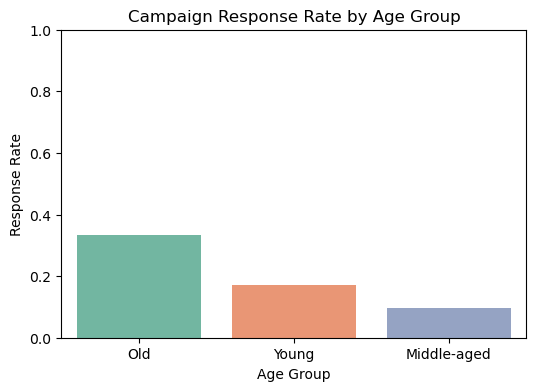

In [94]:
age_response_rate = df.groupby('age_category')['response_binary'].mean().sort_values(ascending=False)
print(age_response_rate)
plt.figure(figsize=(6,4))
sns.barplot(x=age_response_rate.index, y=age_response_rate.values, palette='Set2')
plt.title('Campaign Response Rate by Age Group')
plt.ylabel('Response Rate')
plt.xlabel('Age Group')
plt.ylim(0, 1)
plt.show()

In [103]:
df['job']

0          management
1          technician
2        entrepreneur
3          management
4          management
             ...     
40836      technician
40837      technician
40838         retired
40839         retired
40840     blue-collar
Name: job, Length: 40841, dtype: object

In [104]:
df['response_binary']

0        0
1        0
2        0
3        0
4        0
        ..
40836    1
40837    1
40838    1
40839    1
40840    0
Name: response_binary, Length: 40841, dtype: int64

C:\Users\Shivam\AppData\Local\Temp\ipykernel_13876\1886801963.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=response_by_job.values,y=response_by_job.index,palette='Set2')


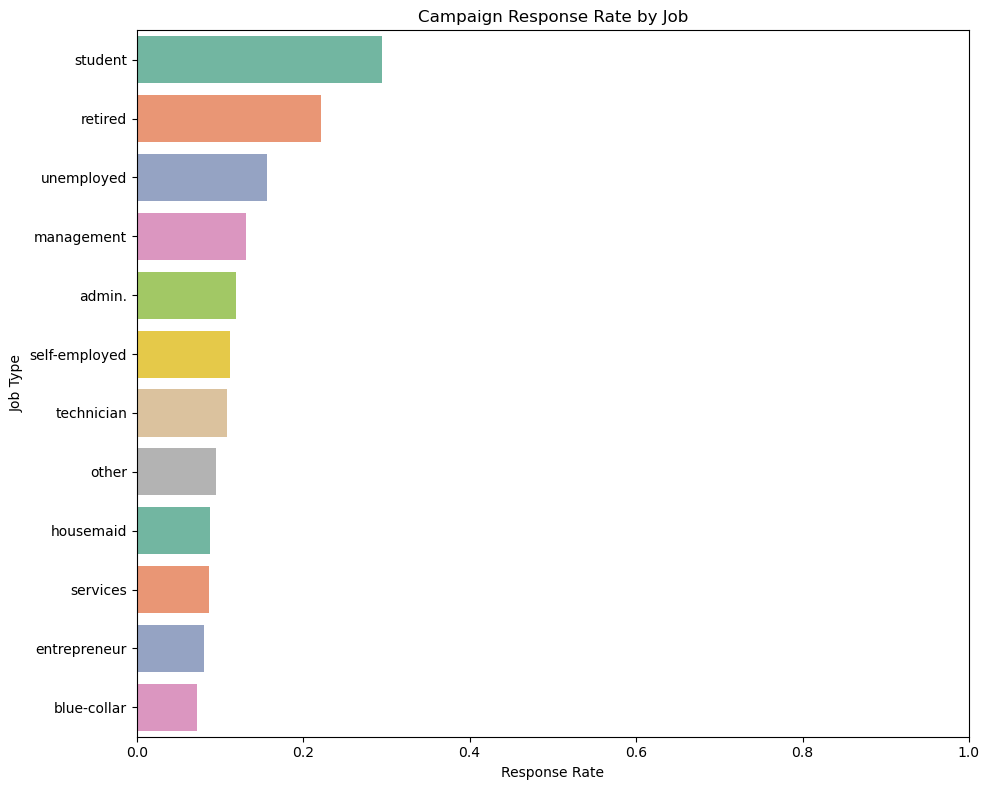

In [123]:
response_by_job = df.groupby('job')['response_binary'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=response_by_job.values,y=response_by_job.index,palette='Set2')
plt.xlabel('Response Rate')
plt.ylabel('Job Type')
plt.title('Campaign Response Rate by Job')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

C:\Users\Shivam\AppData\Local\Temp\ipykernel_13876\2755758172.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=response_by_education.index,y=response_by_education.values,palette='Set1')


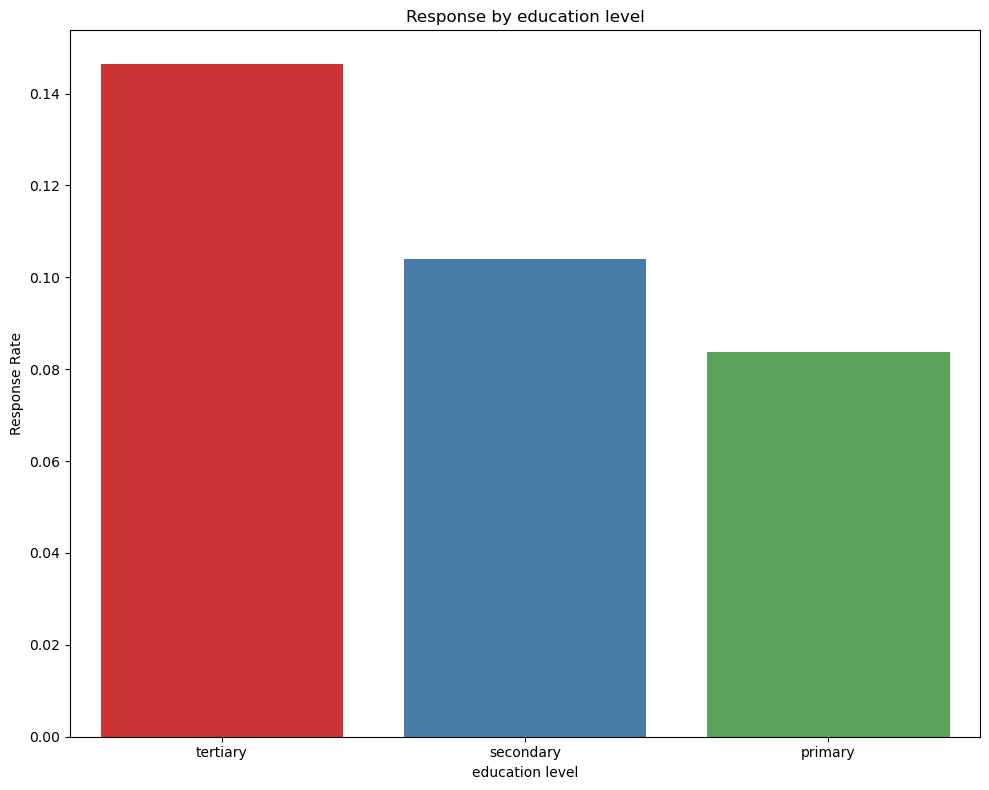

In [130]:
response_by_education = df.groupby('education')['response_binary'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=response_by_education.index,y=response_by_education.values,palette='Set1')
plt.title('Response by education level')
plt.xlabel('education level')
plt.ylabel('Response Rate')
plt.tight_layout()
plt.show()

C:\Users\Shivam\AppData\Local\Temp\ipykernel_13876\2417044925.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=response_by_marital.index,y=response_by_marital.values,palette='Set1')


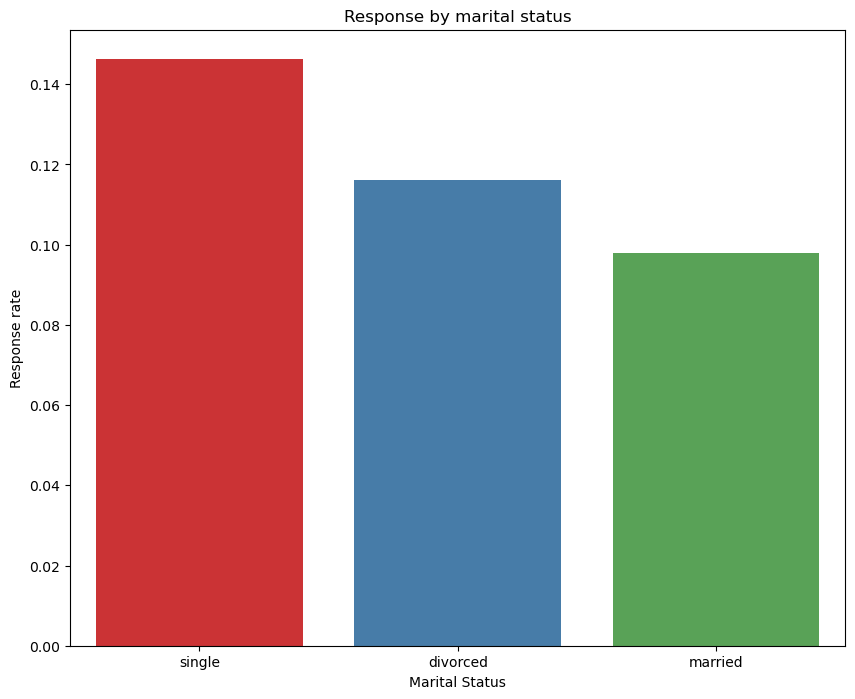

In [135]:
response_by_marital = df.groupby('marital')['response_binary'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=response_by_marital.index,y=response_by_marital.values,palette='Set1')
plt.title('Response by marital status')
plt.xlabel('Marital Status')
plt.ylabel('Response rate')
plt.show()

In [136]:
df

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,45205,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,1
40837,45206,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,1
40838,45207,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,1
40839,45208,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,1


In [142]:
df['housing_binary'] = df['housing'].apply(lambda x:1 if x=='yes' else 2)

In [145]:
df['loan_binary'] = df['loan'].apply(lambda x:1 if x=='yes' else 2)

C:\Users\Shivam\AppData\Local\Temp\ipykernel_13876\2091622522.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=response_by_housing.index,y=response_by_housing.values,palette='Set2')


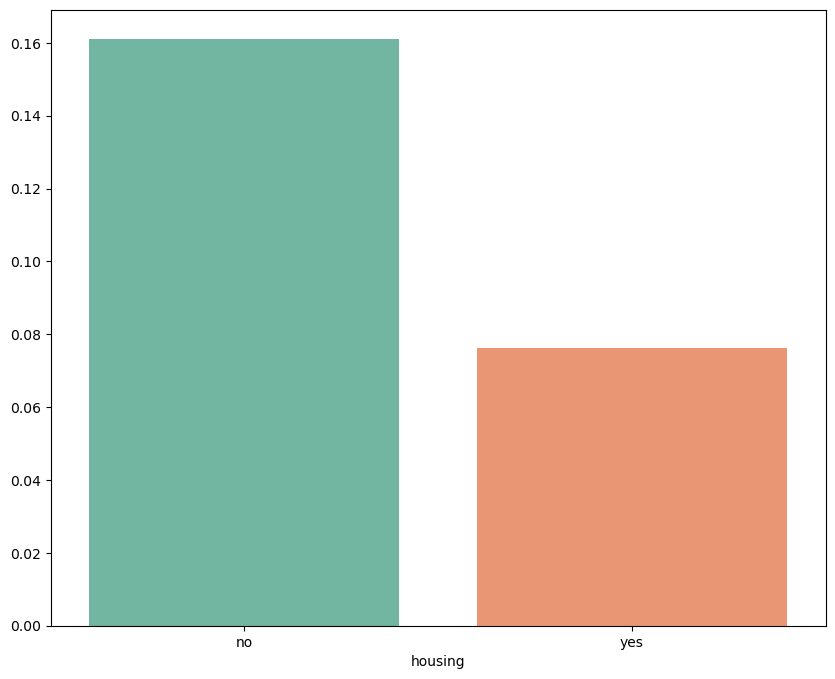

C:\Users\Shivam\AppData\Local\Temp\ipykernel_13876\2091622522.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=response_by_loan.index,y=response_by_loan.values,palette='Set1')


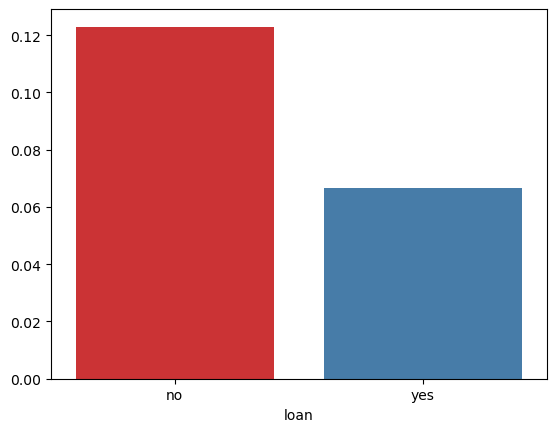

In [151]:
response_by_housing = df.groupby('housing')['response_binary'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=response_by_housing.index,y=response_by_housing.values,palette='Set2')
plt.show()
response_by_loan = df.groupby('loan')['response_binary'].mean().sort_values(ascending=False)
sns.barplot(x=response_by_loan.index,y=response_by_loan.values,palette='Set1')
plt.show()

In [158]:
df

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary,housing_binary,loan_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0,1,2
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0,1,2
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0,1,1
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0,1,2
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,45205,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,1,2,1
40837,45206,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,1,2,2
40838,45207,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,1,2,2
40839,45208,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,1,2,2


C:\Users\Shivam\AppData\Local\Temp\ipykernel_13876\2314507938.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=response_by_month.index,y=response_by_month.values,palette='Set2')


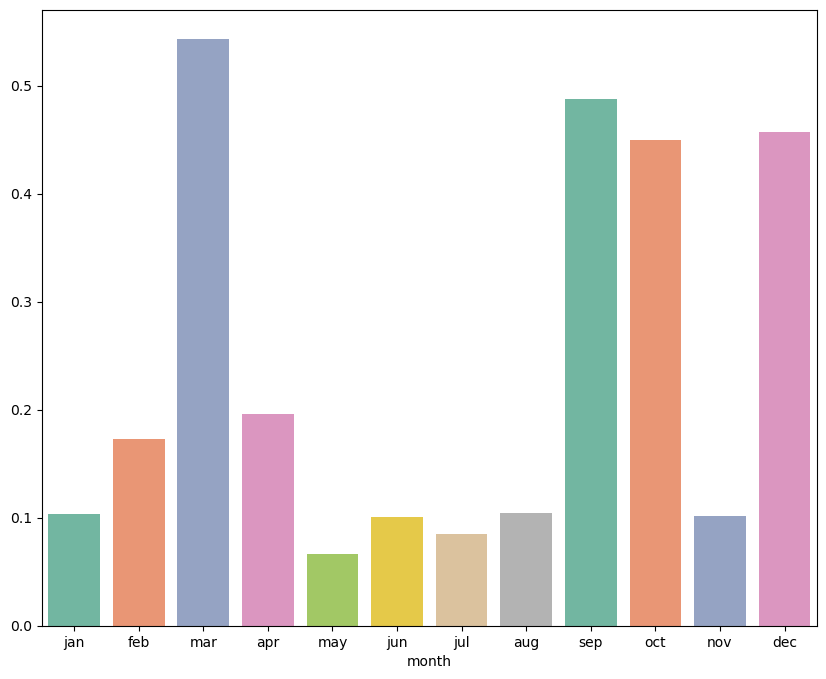

In [166]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
response_by_month = df.groupby('month')['response_binary'].mean().reindex(month_order)
plt.figure(figsize=(10,8))
sns.barplot(x=response_by_month.index,y=response_by_month.values,palette='Set2')
plt.show()

In [169]:
df['poutcome'].unique()

array(['unknown', 'failure', 'success'], dtype=object)

C:\Users\Shivam\AppData\Local\Temp\ipykernel_13876\187126598.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=response_by_poutcome.index,y=response_by_poutcome.values,palette='coolwarm')


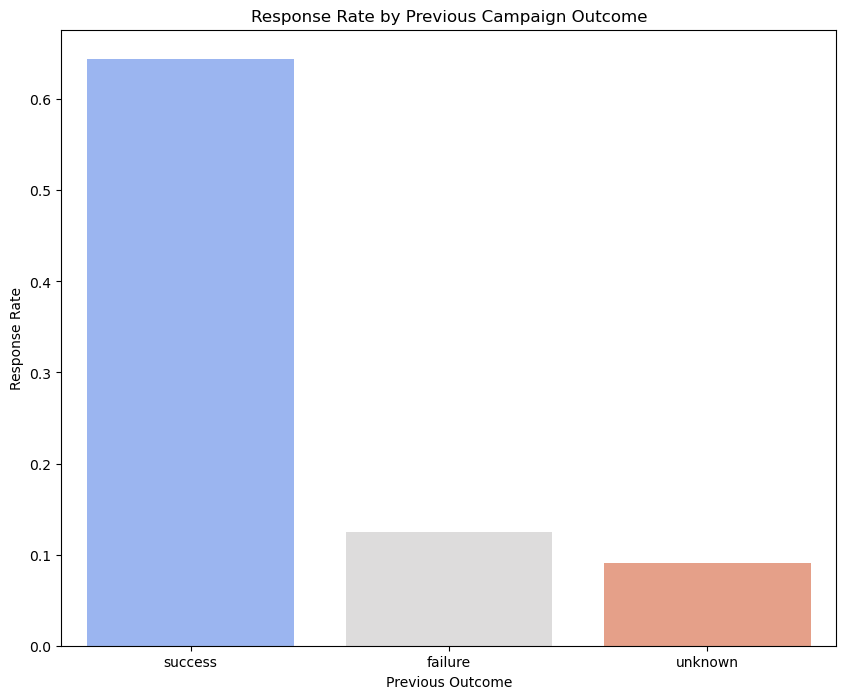

In [172]:
response_by_poutcome = df.groupby('poutcome')['response_binary'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=response_by_poutcome.index,y=response_by_poutcome.values,palette='coolwarm')
plt.title('Response Rate by Previous Campaign Outcome')
plt.xlabel('Previous Outcome')
plt.ylabel('Response Rate')
plt.show()

In [173]:
df

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary,housing_binary,loan_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0,1,2
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0,1,2
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0,1,1
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0,1,2
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,45205,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,1,2,1
40837,45206,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,1,2,2
40838,45207,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,1,2,2
40839,45208,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,1,2,2


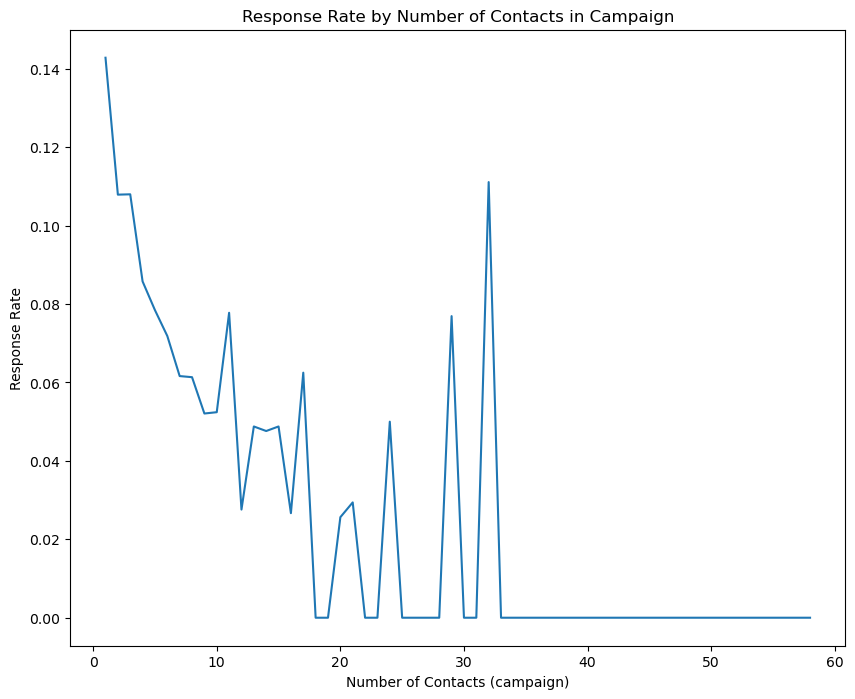

In [184]:
response_by_campaign = df.groupby('campaign')['response_binary'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.lineplot(x=response_by_campaign.index,y=response_by_campaign.values)
plt.title('Response Rate by Number of Contacts in Campaign')
plt.xlabel('Number of Contacts (campaign)')
plt.ylabel('Response Rate')
#plt.xticks(response_by_campaign.index)  # to show all points on x-axis clearly
plt.show()

In [193]:
df

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary,housing_binary,loan_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0,1,2
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0,1,2
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0,1,1
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0,1,2
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,45205,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,1,2,1
40837,45206,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,1,2,2
40838,45207,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,1,2,2
40839,45208,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,1,2,2


In [194]:
response_by_loan

loan
no     0.122936
yes    0.066775
Name: response_binary, dtype: float64

In [2]:
import pandas as pd
from scipy.stats import chi2_contingency

# Step 1: Create a contingency table
contingency_table = pd.crosstab(df['housing'], df['response_binary'])
print("Contingency Table:\n", contingency_table)

# Step 2: Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

# Step 3: Interpret
if p < 0.05:
    print("\n The result is statistically significant — housing loan status affects campaign response.")
else:
    print("\n The result is NOT statistically significant — no strong evidence of effect.")


Contingency Table:
 response_binary      0     1
housing                     
no               15119  2902
yes              21083  1737

Chi-Square Statistic: 720.3013637633788
p-value: 1.1511403895804995e-158
Degrees of Freedom: 1
Expected Frequencies:
 [[15974.0516148  2046.9483852]
 [20227.9483852  2592.0516148]]

 The result is statistically significant — housing loan status affects campaign response.


In [3]:
df.to_csv('student_performance_final.csv', index=False)
